In [2]:
##Gráfica de número de manzanas por alcaldía e índice de desarrollo social
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, showtext, srvyr)

Loading required package: pacman



In [3]:
#Fuente para los gráficos
font_add_google("Roboto", "rob")
showtext_auto()

In [141]:
ids<-openxlsx::read.xlsx("https://www.evalua.cdmx.gob.mx/storage/app/media/2024/die/ids/2/base_mza.xlsx")%>%
#Eliminar si e_idsm es na
filter(!is.na(e_idsm))%>%
#Generar clave de alcaldía, son los caracteres 3 a 5
mutate(alcaldia=substr(folio_mza,3,5))%>%
#Crear nom_alc
mutate(nom_alc=case_when(
alcaldia=="002"~"Azcapotzalco",
alcaldia=="003"~"Coyoacán",
alcaldia=="004"~"Cuajimalpa",
alcaldia=="005"~"Gustavo A. Madero",
alcaldia=="006"~"Iztacalco",
alcaldia=="007"~"Iztapalapa",
alcaldia=="008"~"La Magdalena Contreras",
alcaldia=="009"~"Milpa Alta",
alcaldia=="010"~"Álvaro Obregón",
alcaldia=="011"~"Tláhuac",
alcaldia=="012"~"Tlalpan",
alcaldia=="013"~"Xochimilco",
alcaldia=="014"~"Benito Juárez",
alcaldia=="015"~"Cuauhtémoc",
alcaldia=="016"~"Miguel Hidalgo",
alcaldia=="017"~"Venustiano Carranza"))%>%
#Conteo por alcaldía de e_idsm
group_by(nom_alc,e_idsm)%>%
summarise(manzanas=n())%>%
#Eliminar
filter(e_idsm!="Sin información")%>%
mutate(porcentaje=manzanas/sum(manzanas)*100)%>%
ungroup()
ids

`summarise()` has grouped output by 'nom_alc'. You can override using the
`.groups` argument.


nom_alc,e_idsm,manzanas,porcentaje
<chr>,<chr>,<int>,<dbl>
Azcapotzalco,Alto,978,33.1637843
Azcapotzalco,Bajo,309,10.4781282
Azcapotzalco,Medio,729,24.7202442
Azcapotzalco,Muy alto,857,29.0606985
Azcapotzalco,Muy bajo,76,2.5771448
Benito Juárez,Alto,618,28.6774942
Benito Juárez,Bajo,17,0.7888631
Benito Juárez,Medio,76,3.5266821
Benito Juárez,Muy alto,1439,66.7749420


In [142]:
orden <- ids %>%
  filter(e_idsm == "Muy bajo") %>%
  arrange(desc(porcentaje)) %>%
  pull(nom_alc)

  
# Ordenar las categorías de `nom_alc`
ids <- ids %>%
  mutate(nom_alc = factor(nom_alc, levels = orden, ordered = FALSE))

# Ordenar las categorías de `e_idsm`
ids <- ids %>%
  mutate(e_idsm = factor(e_idsm, levels = rev(c("Muy bajo", "Bajo", "Medio", "Alto", "Muy alto")), ordered = TRUE))

 orden

[1] "Milpa Alta"             "Xochimilco"             "Tláhuac"               
 [4] "Iztapalapa"             "La Magdalena Contreras" "Tlalpan"               
 [7] "Cuajimalpa"             "Álvaro Obregón"         "Gustavo A. Madero"     
[10] "Venustiano Carranza"    "Cuauhtémoc"             "Iztacalco"             
[13] "Coyoacán"               "Miguel Hidalgo"         "Azcapotzalco"          
[16] "Benito Juárez"

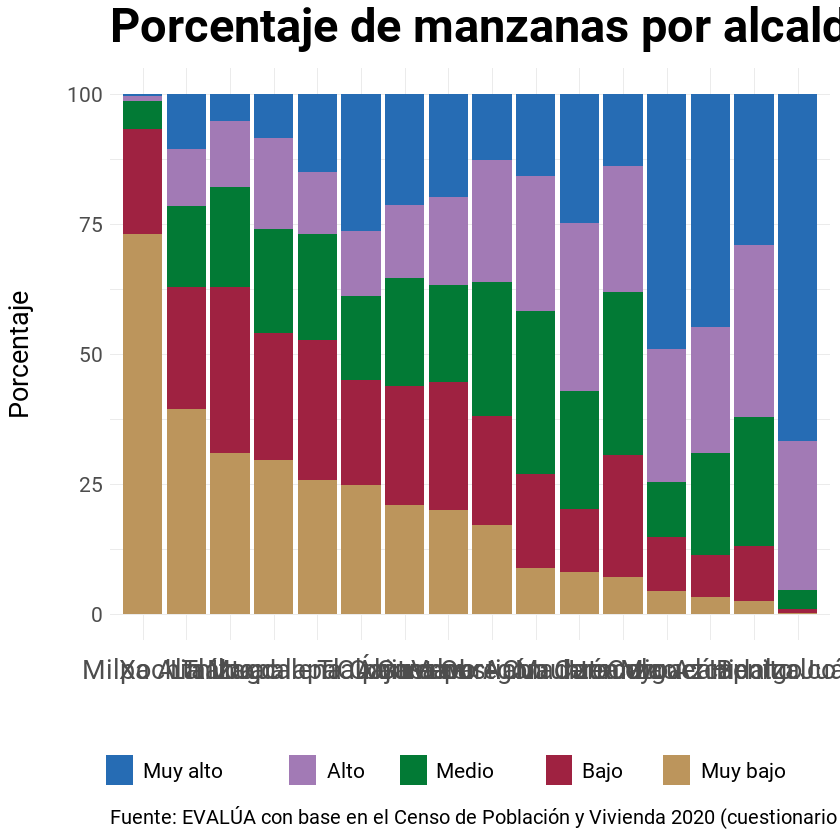

In [155]:
#Gráfica de barras de porcentaje de manzanas por alcaldía

ids %>%


  ggplot(aes(x=nom_alc, y=porcentaje, fill=e_idsm)) +
  geom_col() +
  scale_x_discrete(expand = expansion(mult = c(0.05, 0.05))) +
  labs(
    title = "Porcentaje de manzanas por alcaldía y estrato de IDS-2020",
    x = "",
    y = "Porcentaje",
    fill = "",
    caption="Fuente: EVALÚA con base en el Censo de Población y Vivienda 2020 (cuestionario básico) del Instituto Nacional de Estadística y Geografía (INEGI)."
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("#266cb4", "#a27ab5", "#027a35", "#9F2241","#BC955C"))+
    theme(
    legend.position = "bottom",
    plot.title = element_text(hjust = 0, size=35,face="bold"),
    plot.subtitle = element_text(hjust = 0, size=20, face="italic"),
    plot.caption = element_text(hjust = 0,size=15),
    axis.text.x = element_text(angle = 0, vjust = 0.5,size=20),
    text=element_text("rob",size=20))


#Salvar svg
ggsave("porcentaje_manzanas_ids_2020.svg", width = 100, height = 50, units = "cm", bg = "transparent")